# PUNTO 6 | QUANTUM MECHANICS 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000
x_min, x_max = -5, 5
x = np.linspace(x_min, x_max, N)
h = x[1] - x[0]

In [3]:
def V(x):
    m = 1
    omega = 1
    return 0.5 * m * (omega**2) * (x**2)

In [4]:
def numerov(x, V, E):
    
    psi = np.zeros_like(x)
    psi[1] = 1e-5

    for i in range(1, len(x) - 1):
        R_n_plus = 2 * (V(x[i + 1]) - E)
        R_n = 2 * (V(x[i]) - E)
        R_n_minus = 2 * (V(x[i - 1]) - E)

        K_plus = 1 - h**2 / 12 * R_n_plus
        K_mid = 2 * (1 + 5*h**2 / 12 * R_n)
        K_minus = 1 - h**2 / 12 * R_n_minus

        psi[i + 1] = (K_mid * psi[i] - K_minus * psi[i - 1]) / K_plus

    return psi

In [5]:
def find_energy_levels_efficient(dE_initial=0.1, dE_refine=0.001, E_max=10):
    
    E_values_coarse = []
    E_values_refined = []

    E = 0
    last_psi_end = None
    while E <= E_max:
        psi = numerov(x, V, E)
        psi_end = psi[-1]

        if last_psi_end is not None and psi_end * last_psi_end < 0:
            E_values_coarse.append(E - dE_initial / 2)

        last_psi_end = psi_end
        E += dE_initial

    
    for E_approx in E_values_coarse:
        E_start = E_approx - dE_initial / 2
        E_end = E_approx + dE_initial / 2
        E = E_start
        last_psi_end = None

        while E <= E_end:
            psi = numerov(x, V, E)
            psi_end = psi[-1]

            if last_psi_end is not None and psi_end * last_psi_end < 0:
                E_values_refined.append(E - dE_refine / 2)

            last_psi_end = psi_end
            E += dE_refine

    return E_values_refined

E_values_refined = find_energy_levels_efficient()

print('Los valores propios de la función son: ')
print(E_values_refined)

Los valores propios de la función son: 
[0.5005, 1.5005000000000002, 2.500500000000001, 3.500500000000002, 4.500500000000001, 5.500499999999997, 6.5004999999999935, 7.502499999999991, 8.511499999999977, 9.53649999999996]


In [6]:
E_levels = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

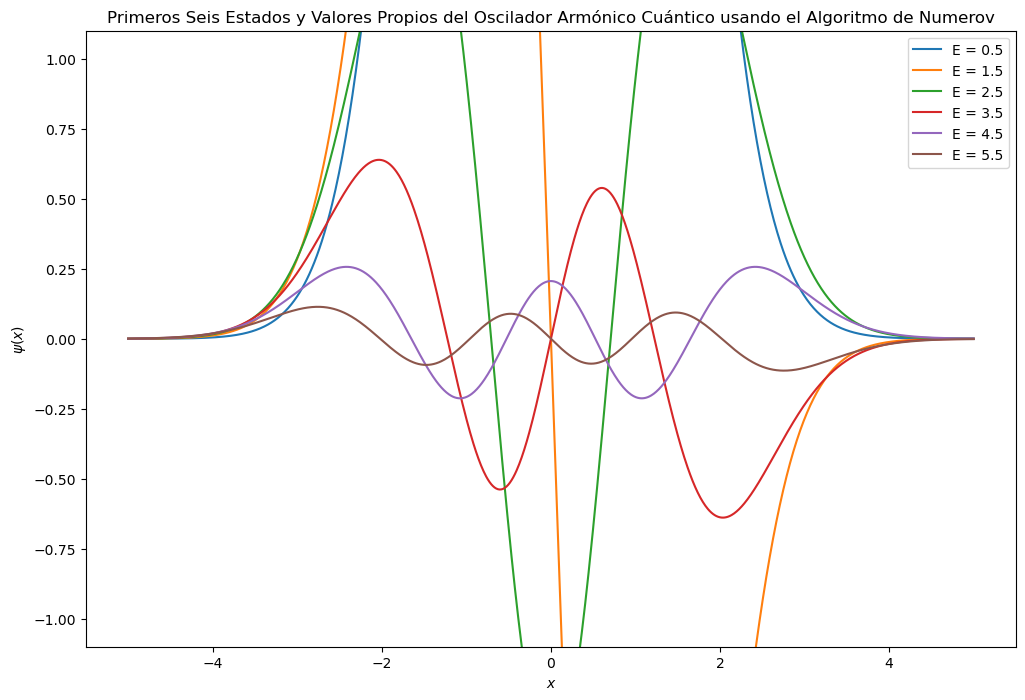

In [14]:
plt.figure(figsize=(12, 8))

for i, E in enumerate(E_levels):
    psi = numerov(x, V, E)
    plt.plot(x, psi*E, label=f'E = {E:.1f}')

plt.title('Primeros Seis Estados y Valores Propios del Oscilador Armónico Cuántico usando el Algoritmo de Numerov')
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.1,1.1)
plt.legend()
plt.show()